# Technika regulacji - Projekt 3&4

**Autorzy:** Iwo Chwiszczuk 280043, Szymon Flis 280153

📅 **Data:** 8 czerwca 2025

## Przygotowanie potrzebnych bibliotek i narzędzi oraz wyliczenie stałych A, B i C

In [181]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
sp.init_printing()

t, s, z = sp.symbols('t, s, z')
h, T = sp.symbols('h, T', positive=True)
k = sp.symbols('k', integer=True)
y_t = sp.Function('y')(t)
y_discrete = sp.IndexedBase('y')
u_discrete = sp.IndexedBase('u')

A, B = 3, 3
C = A + B

## Zadanie 1

### Wyprowadzenie równań różnicowych z równań różniczkowych dla dwóch wybranych czasów próbkowania

#### Funkcja wyznaczająca równanie różnicowe, dla danego równania różniczkowego i czasu próbkowania

In [182]:
def differential_to_difference(differential_eq, h):
    difference_eq = differential_eq.subs({
        sp.diff(y_t, t, t): (y_discrete[k] - 2*y_discrete[k-1] + y_discrete[k-2]) / h**2,
        sp.diff(y_t, t): (y_discrete[k] - y_discrete[k-1]) / h,
        y_t: y_discrete[k],
        t: h*k
    })

    return difference_eq

h1, h2 = 0.1, 0.5
eq1 = sp.Eq(sp.diff(y_t, t, t) + 3*sp.diff(y_t, t) + y_t, sp.sin(sp.Symbol('omega')*t))
eq2 = sp.Eq(sp.diff(y_t, t, t) + sp.diff(y_t, t) - 2*y_t, 0)
eq3 = sp.Eq(sp.diff(y_t, t, t) + 3*sp.diff(y_t, t) + y_t, t)

display(Markdown(f"#### **Obiekt I**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq1)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq1, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq1, h2))}$"))

display(Markdown(f"#### **Obiekt II**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq2)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq2, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq2, h2))}$"))

display(Markdown(f"#### **Obiekt III**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq3)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq3, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq3, h2))}$"))


#### **Obiekt I**

**Równanie różniczkowe:**<br>$y{\left(t \right)} + 3 \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = \sin{\left(\omega t \right)}$

**Równanie różnicowe dla h = 0.1:**<br>$- 230.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 131.0 {y}_{k} = \sin{\left(0.1 k \omega \right)}$

**Równanie różnicowe dla h = 0.5:**<br>$- 14.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 11.0 {y}_{k} = \sin{\left(0.5 k \omega \right)}$

#### **Obiekt II**

**Równanie różniczkowe:**<br>$- 2 y{\left(t \right)} + \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = 0$

**Równanie różnicowe dla h = 0.1:**<br>$- 210.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 108.0 {y}_{k} = 0$

**Równanie różnicowe dla h = 0.5:**<br>$- 10.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 4.0 {y}_{k} = 0$

#### **Obiekt III**

**Równanie różniczkowe:**<br>$y{\left(t \right)} + 3 \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = t$

**Równanie różnicowe dla h = 0.1:**<br>$- 230.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 131.0 {y}_{k} = 0.1 k$

**Równanie różnicowe dla h = 0.5:**<br>$- 14.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 11.0 {y}_{k} = 0.5 k$

### Symulacja odpowiedzi systemów opisanych równaniami różnicowymi

#### Funkcja symulująca odpowiedź układu o zadanym równaniu różnicowym na zadane pobudzenie

In [183]:
def simulate_discrete_system(difference_eq, initial_conditions, u_vals, u_name):
    steps = len(u_vals)
    y_vals = np.zeros(steps)
    
    for i in range(steps):
        to_sub = {u_discrete[k + n]: u_vals[i + n] if i + n >= 0 else 0 for n in range(-4, 1)}
        to_sub.update({y_discrete[k + n]: y_vals[i + n] if i + n >= 0 else 0 for n in range(-2, 1)})
        to_sub.update(initial_conditions)
        to_sub[k] = i

        y_i = sp.solve(difference_eq, y_discrete[k])
        y_vals[i] = float(y_i[0].subs(to_sub))

    k_vals = np.arange(steps)
    plt.stem(k_vals, y_vals, linefmt='b-', markerfmt='bo', basefmt='r-', label='Odpowiedź y[k]')
    plt.stem(k_vals, u_vals, linefmt='g--', markerfmt='gx', basefmt='r-', label='Pobudzenie u[k]')
    plt.title(fr'Odpowiedź systemu dyskretnego ${sp.latex(difference_eq)}$ z warunkami początkowymi ${sp.latex(initial_conditions)}$ na {u_name}')
    plt.xlabel('k')
    plt.ylabel('Wartość')
    plt.grid(True)
    plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.show()


impulse_input = np.zeros(50)
impulse_input[0] = 1

step_input = np.ones(50)

#### System I

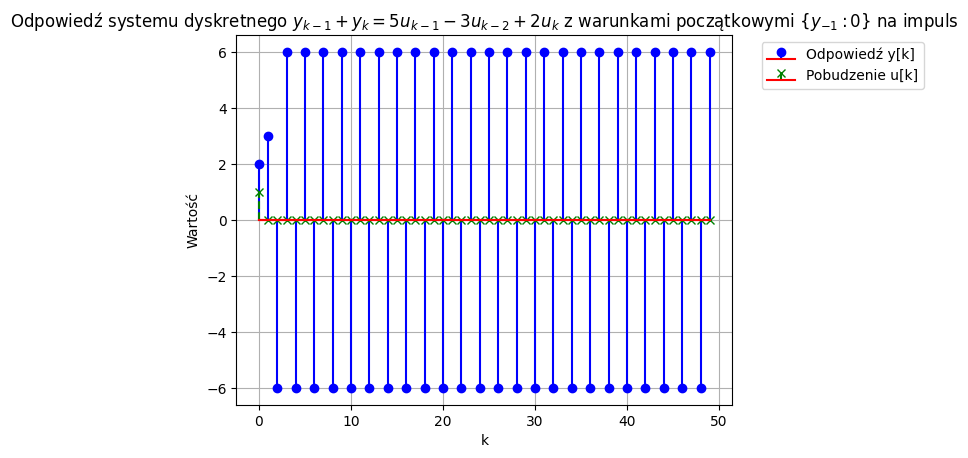

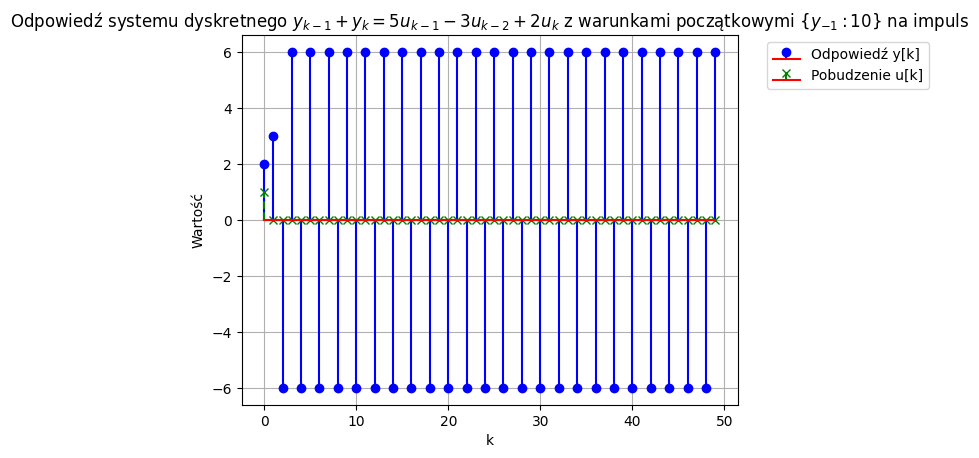

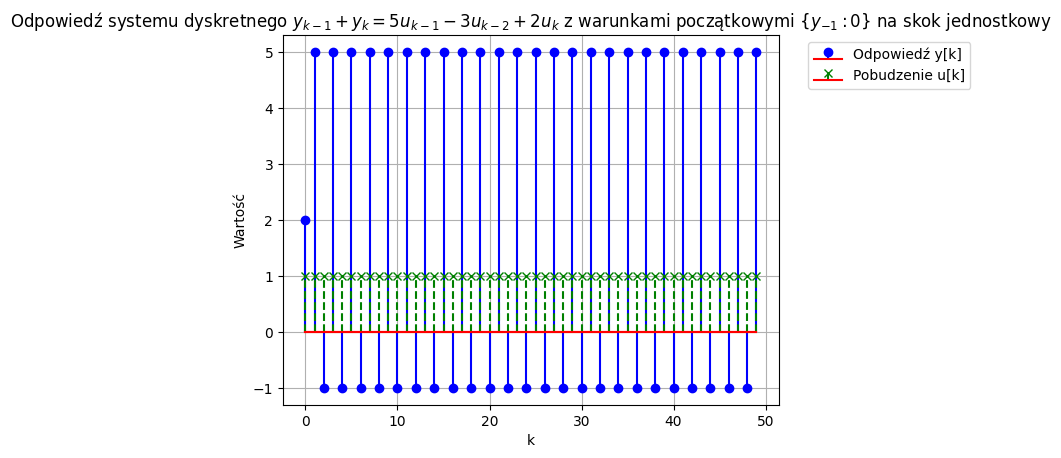

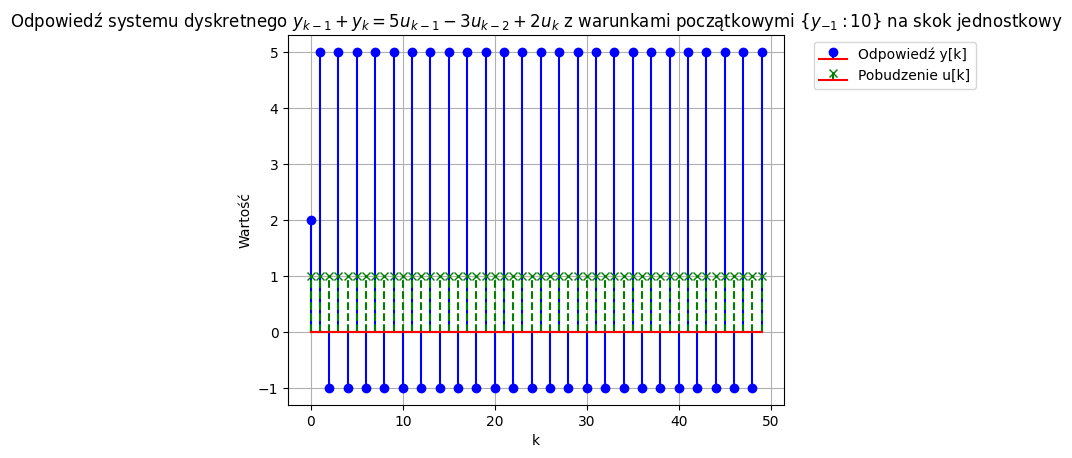

In [184]:
eq = sp.Eq(y_discrete[k-1] + y_discrete[k], 2*u_discrete[k] + 5*u_discrete[k-1] - 3*u_discrete[k-2])
ics1 = {y_discrete[-1]: 0}
ics2 = {y_discrete[-1]: 10}
simulate_discrete_system(eq, ics1, impulse_input, 'impuls')
simulate_discrete_system(eq, ics2, impulse_input, 'impuls')
simulate_discrete_system(eq, ics1, step_input, 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input, 'skok jednostkowy')

#### System II

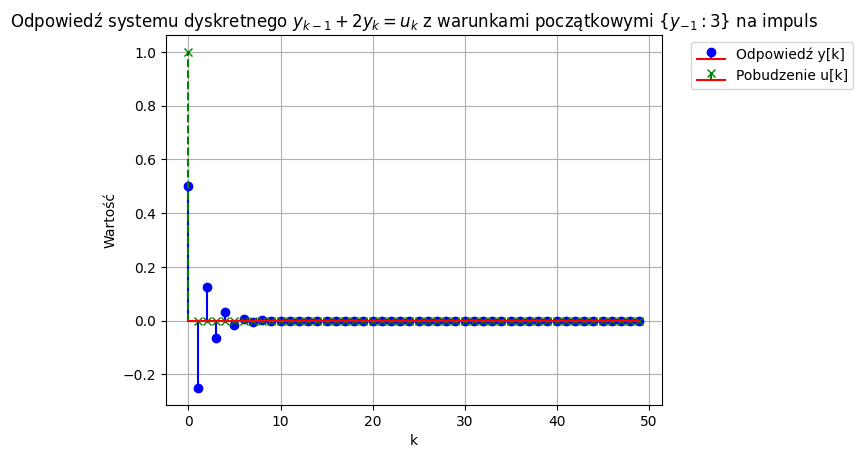

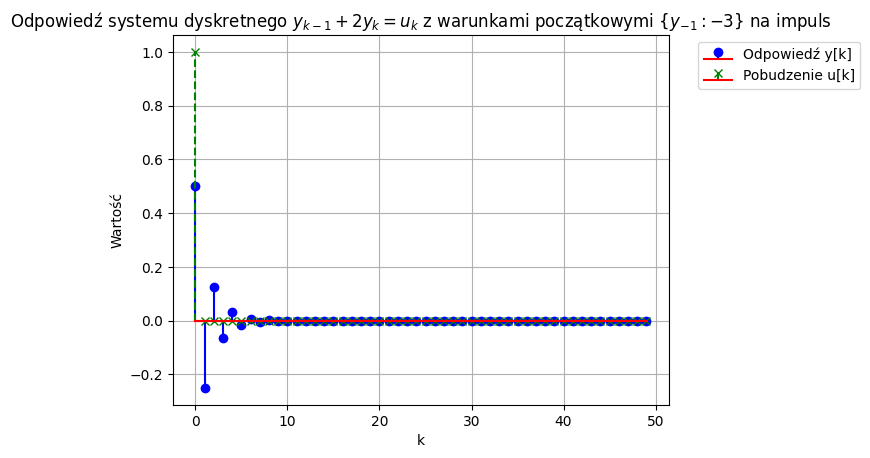

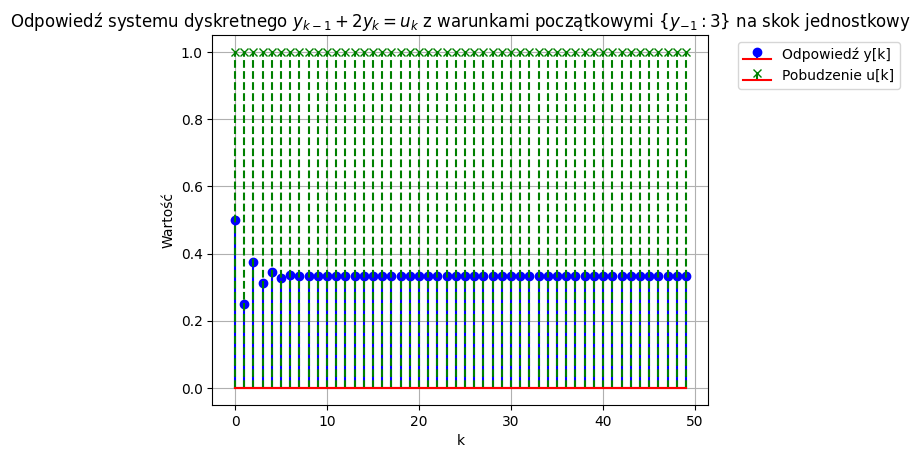

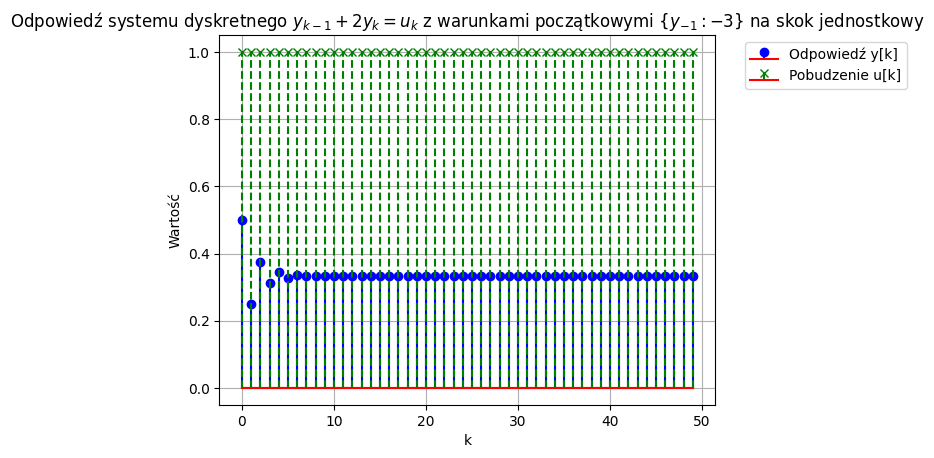

In [185]:
eq = sp.Eq(y_discrete[k-1] + 2*y_discrete[k], u_discrete[k])
ics1 = {y_discrete[-1]: 3}
ics2 = {y_discrete[-1]: -3}
simulate_discrete_system(eq, ics1, impulse_input, 'impuls')
simulate_discrete_system(eq, ics2, impulse_input, 'impuls')
simulate_discrete_system(eq, ics1, step_input, 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input, 'skok jednostkowy')


#### System III

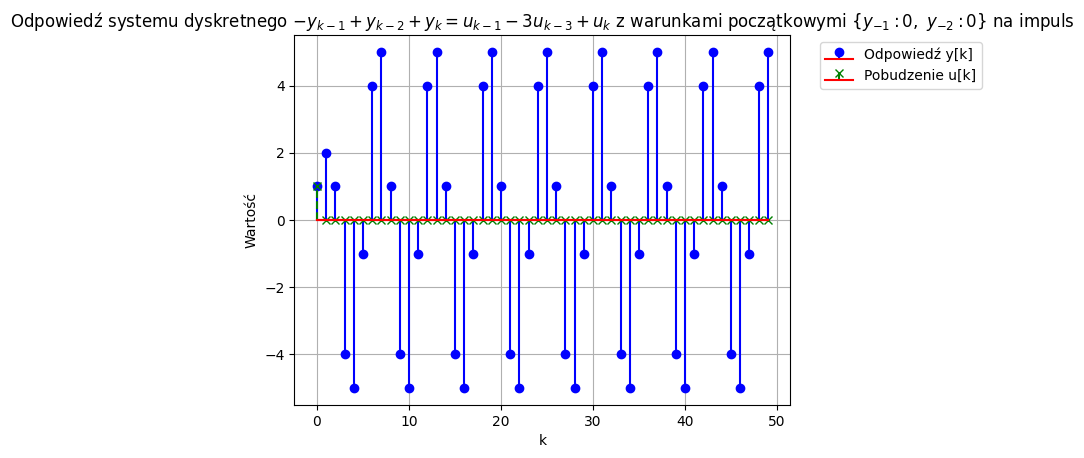

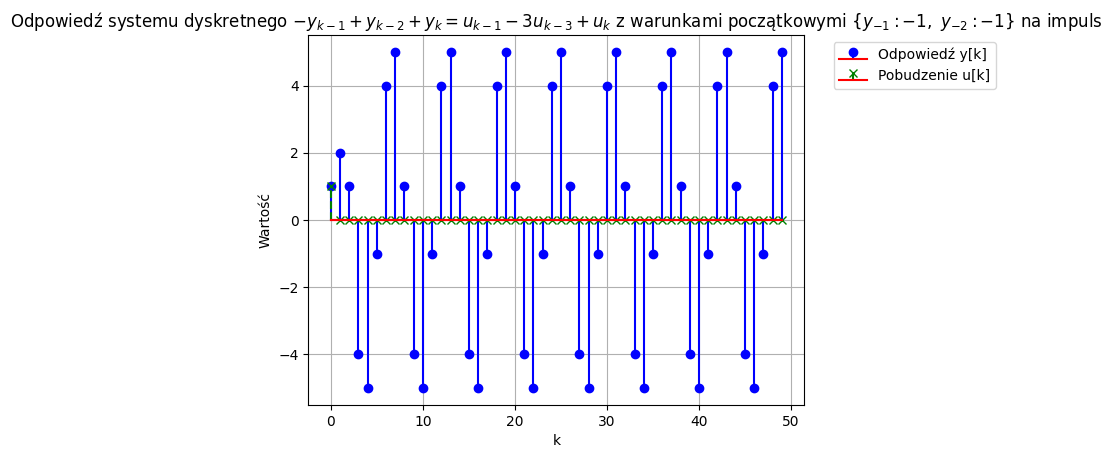

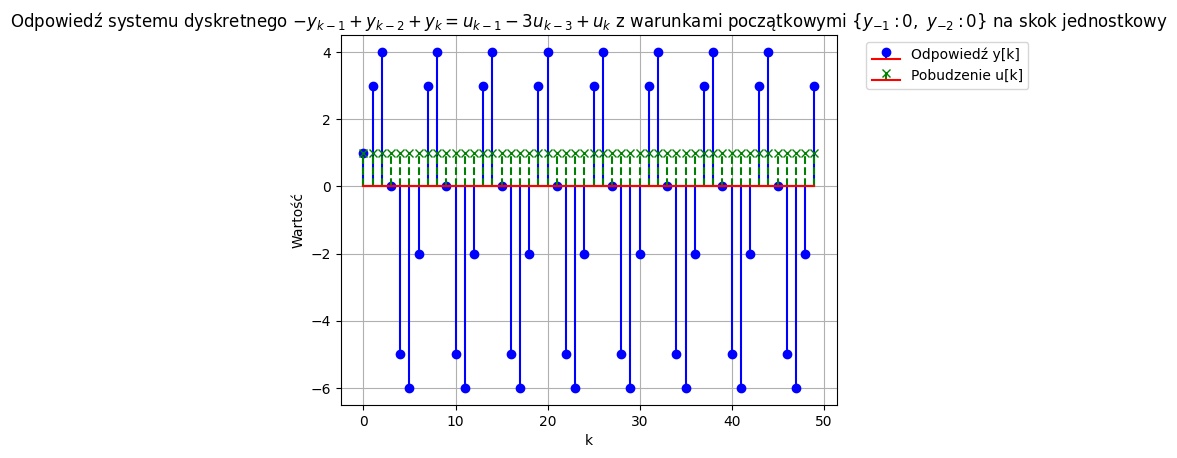

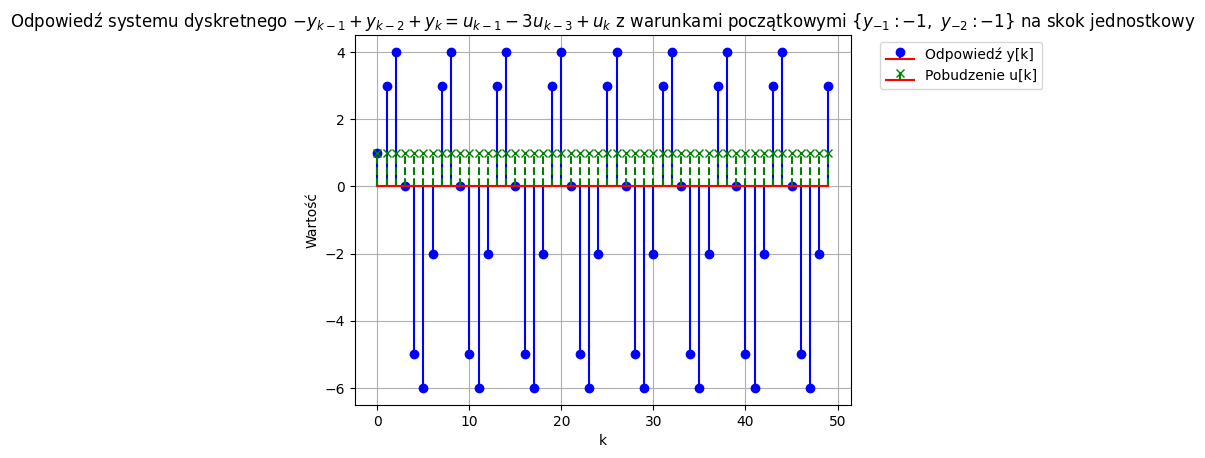

In [186]:
eq = sp.Eq(y_discrete[k-2] - y_discrete[k-1] + y_discrete[k], u_discrete[k] + u_discrete[k-1] - 3*u_discrete[k-3])
ics1 = {y_discrete[-1]: 0, y_discrete[-2]: 0}
ics2 = {y_discrete[-1]: -1, y_discrete[-2]: -1}
simulate_discrete_system(eq, ics1, impulse_input, 'impuls')
simulate_discrete_system(eq, ics2, impulse_input, 'impuls')
simulate_discrete_system(eq, ics1, step_input, 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input, 'skok jednostkowy')

### Transformata Z

In [224]:
import lcapy as lc
from lcapy import s, t
from lcapy.discretetime import k, z, n

G1_s = C/((s+A)*(s+B)*(s-1))
display(Markdown(f"$$G_1(s) = {sp.latex(G1_s)}$$"))

$$G_1(s) = \frac{6}{\left(s - 1\right) \left(s + 3\right)^{2}}$$

In [266]:
g1_kT = G1_s.inverse_laplace().subs({lc.Heaviside(t): 1, t: k*T}).args[0][0].simplify()
display(Markdown(f"$$g_1(kT) = {sp.latex(g1_kT)}$$"))
G1_z = lc.ZT(g1_kT, k, z)
display(Markdown(f"$$G_1(z) = {sp.latex(G1_z)}$$"))

$$g_1(kT) = \frac{3 \left(- 4 T k + e^{4 T k} - 1\right) e^{- 3 T k}}{8}$$

$$G_1(z) = - \frac{3 T z e^{3 T}}{2 \left(z e^{3 T} - 1\right)^{2}} - \frac{3 z e^{3 T}}{8 \left(z e^{3 T} - 1\right)} + \frac{3 z}{8 \left(z - e^{T}\right)}$$

### Odwrotna Transformata Z

In [263]:
izt_G1_z = lc.expr(G1_z).IZT().subs({n: k}).args[0][0].simplify()
display(Markdown(rf"$$Z^{{-1}}\{{G_1(z)\}} = {sp.latex(izt_G1_z)}$$"))

$$Z^{-1}\{G_1(z)\} = \frac{3 \left(- 4 T k + e^{4 T k} - 1\right) e^{- 3 T k}}{8}$$

### Wnioski
- Transformacja równań różniczkowych na różnicowe
    - Pokazano skuteczną metodę przejścia od równań różniczkowych (opisujących systemy ciągłe) do równań różnicowych (opisujących systemy dyskretne) dla różnych kroków czasowych h
    - Dla różnych obiektów otrzymano odpowiadające im równania różnicowe, co demonstruje uniwersalność metody
- Symulacja systemów dyskretnych
    - Zaimplementowana funkcja simulate_discrete_system pozwala na symulację odpowiedzi systemów dyskretnych na różne wymuszenia
    - Symulacje pokazują znaczący wpływ warunków początkowych na odpowiedź symulowanych systemów
    - Systemy wykazują różne zachowania w zależności od struktury równania różnicowego i warunków początkowych
- Transformata Z i Odwrotna Transformata Z
    - Wyznaczono Transformatę Z systemu na podstawie transmitancji ciągłej wykorzystując bibliotekę lcapy (która jest rozszerzeniem biblioteki sympy m.in. w zakresie działań w dziedzinie dyskretnej)
    - Wyznaczono Odwrotną Transformatę Z i potwierdzono jej poprawność porównując ją z oryginalną odpowiedzią impulsową w dziedzinie dyskretnej

## Zadanie 2

## Zadanie 3